## Frozen Lake Agent Implementation with Reinforcement Learning

##### This program tries to implement an agent that plays Frozen Lake by walking only on the frozen tiles and avoiding holes to reach goal state with Deep Reinforcement Learning by implementing Q table

The surface is described as:-
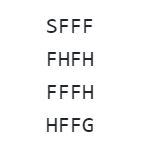


This grid represents the environment, with S as the agent's starting point which is safe. F stands for the frozen surface and is also a safe . H stands for a hole, and stepping into a hole is not safe. Finally, G stands for the goal, which is the grid spot where the prized frisbee resides.
The agent can go left, right, up, and down, and the episode concludes when the agent achieves the goal or falls into a hole. If it achieves the goal, it earns a one-point reward; otherwise, it receives a zero-point reward.

In [13]:
#Importing libraries
import numpy as np
import gym
import random
import time
from IPython.display import clear_output

In [14]:
#Setting up the environement
env = gym.make("FrozenLake-v1")
print(env)
action_size = env.action_space.n
state_size = env.observation_space.n
print(action_size)
print(state_size)

<TimeLimit<FrozenLakeEnv<FrozenLake-v1>>>
4
16


In [15]:
#Creating Q table and initialising all the Q-values to zero for each state-action pair.
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [16]:
#Paramater initialisation
total_episodes = 20000        
learning_rate = 0.8           
max_steps = 99                
gamma = 0.95                  

# Exploration parameters
epsilon = 1.0                 
max_epsilon = 1.0             
min_epsilon = 0.01            
decay_rate = 0.005             

In [17]:
#To hold all the rewards
rewards = []
for episode in range(total_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    for step in range(max_steps):
        exp_exp_tradeoff = random.uniform(0, 1)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
        else:
            action = env.action_space.sample()
        new_state, reward, done, info = env.step(action)
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        total_rewards += reward
        state = new_state
        if done == True: 
            break
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)
print ("Score: " +  str(sum(rewards)/total_episodes))
print(qtable)


Score: 0.48485
[[2.72410733e-01 8.46745727e-02 2.71207412e-02 1.01200007e-01]
 [7.57225144e-03 3.16070816e-03 2.61914488e-03 1.19577166e-01]
 [6.37633256e-03 4.72566726e-03 4.02838004e-03 2.60025913e-02]
 [1.67308341e-03 5.16211965e-03 6.22734402e-04 1.43855119e-02]
 [3.47245102e-01 8.26073936e-02 2.96179850e-02 5.89047706e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.20102059e-03 8.45402573e-04 4.92025269e-05 1.84368981e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.19323266e-02 8.57066031e-03 2.52409379e-02 4.34404473e-01]
 [7.10553327e-03 7.63143971e-01 2.08078809e-04 3.23942006e-01]
 [8.84844649e-01 2.66556365e-04 1.86419107e-03 4.86174880e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.85827667e-02 1.09542013e-01 5.76322804e-01 1.26134760e-03]
 [2.51544637e-01 9.80819065e-01 2.05031402e-01 2.02525418e-01]
 [0.00000000e+00 0.00000000e+00 0.000000

In [20]:
#Agent playing frozen Lake
env.reset()
for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
    print("EPISODE ", episode)
    for step in range(max_steps):
        action = np.argmax(qtable[state,:])
        new_state, reward, done, info = env.step(action)
        if done:
            env.render()
            print("No of steps taken", step)
            break
        state = new_state
env.close()

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
EPISODE  0
  (Down)
SFFF
FHFH
FFFH
HFFG
No of steps taken 43
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
EPISODE  1
  (Left)
SFFF
FHFH
FFFH
HFFG
No of steps taken 35
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
EPISODE  2
  (Down)
SFFF
FHFH
FFFH
HFFG
No of steps taken 6
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
EPISODE  3
  (Down)
SFFF
FHFH
FFFH
HFFG
No of steps taken 27
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
EPISODE  4
  (Down)
SFFF
FHFH
FFFH
HFFG
No of steps taken 29
